# Lecture VIII

Modelling and Machine Learning of Dynamical Systems in Julia


# Climate Models (Part II) & PDEs (Part I) 

## Contents 

* Partial Differential Equations: Finite Differences
* Julia/Programming: Parallelism 

## Recap: Energy Balance Models (EBMs)

* Highly simplified models that determine the temperatur of the surface of the Earth by considering the balance of in- and outgoing radition, i.e. energy

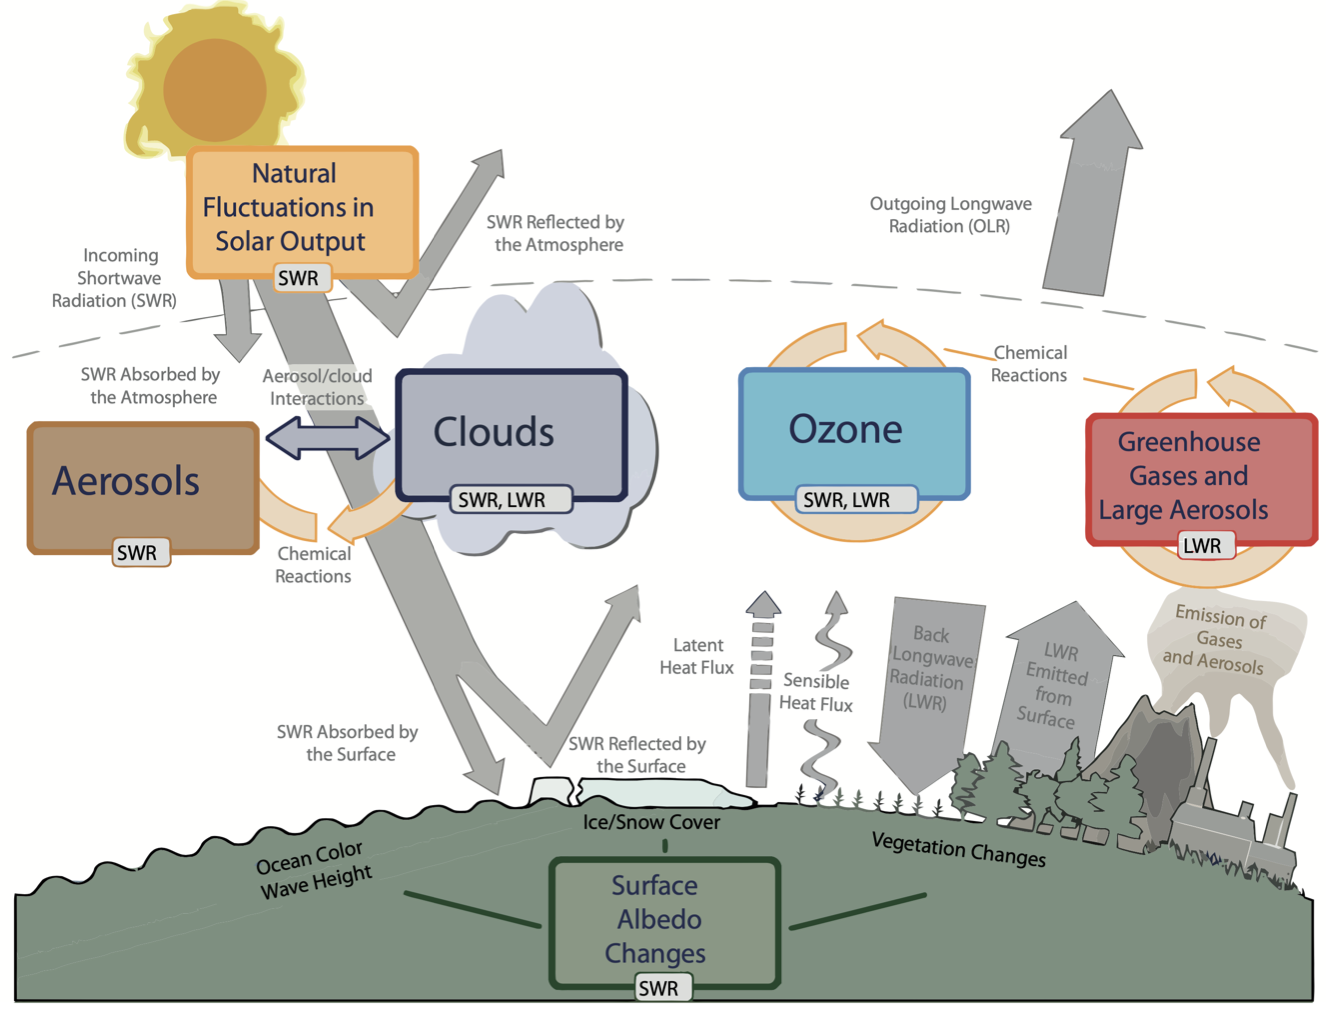 (Figure IPCC AR5)

### Zero-Dimensional EBMs 

* The average surface temperature $T$ is approximately in an equilibrium. It is changing slowly due to natural variability and anthropogenic climate change but these effects happen are long-term effects, that we will neglect for our very coarse models
* For an equilibrium, we have to find fixed points of the model: 

$$\begin{align} 
\frac{dE}{dt} &= E_{in}(T) - E_{out}(T)\\
0 &= E_{in}(T) - E_{out}(T)
\end{align}$$

$$\frac{dE}{dt} = (1 - \alpha)\frac{\pi r^2}{4\pi r^2} S_0 - \sigma T^4$$


* $\alpha$ is the albedo, so reflectivity of the surface, $\alpha=1$ means all raditation is reflected, for $\alpha=0$ all is absorbed, Earth's average albedo is $\approx0.3$
* $\frac{\pi r^2}{4\pi r^2}$ is the ratio of cross-section to surface of a sphere
    * this is present as the Earth emmits radiation over its complete surface but only receives radition on one side
* $S_0$ is the solar constant $1363 Wm^{-2}$
* $\sigma T^4$ is the outgoing black body radition according the Stefan Boltzmann law, with the Boltzmann constant $5.67\cdot10^{-8}Wm^{-2}K^{-4}$


### One-Dimensional EBMs 

* So far we treaded Earth just as a point with a uniform temperature
* One-Dimensional EBMs make the temperature latitude dependent 
* The basic ansatz is 

$$\begin{align} 
C(\phi) \frac{\partial T}{\partial t} &= E_{in}(\phi,T) - E_{out}(\phi,T) + D(\phi,T,\partial T/\partial \phi, \partial^2 T/\partial \phi^2)
\end{align}$$ 

* $C(\phi)$ is the latitude dependent heat capacity 
* There are in- and outgoing raditation/energy 
* And a diffusion term $D$, the diffusion term included partial derivatives with respect to the latitude 
* This makes these models *partial differential equations*



## Partial Differential Equations (PDEs)

* Partial Differential Equations are equations of the type: 

$$\begin{align}
\frac{\partial}{\partial t}u(x_1,x_2,...,t) &= f(u(x_1,x_2,...,t),\frac{\partial}{\partial x_1}u(x_1,x_2,...,t),\\ &\frac{\partial}{\partial x_2}u(x_1,x_2,...,t),...,\frac{\partial^2}{\partial x_1^2}u(x_1,x_2,...,t),...)
\end{align}$$

* Partial derivatives with respect to multiple variables occur. Often this is time and some spatial coordinates
* They are often used to describe spatiotemporal dynamics, e.g. diffusion, advection, ...
* We've seen the Navier-Stokes equation as one example 
* Most climate models are PDEs 
* Typically, we need to define a domain and boundary condition for $x_i$, e.g. $x_i\in[0,L]$ and $u(0,..,t)=0, u(x_i,..,t)\quad\forall t$

### Boundary Conditions 

There are different kind of boundary conditions if $x_i\in[0,L]$: 
* Dirichlet boundary conditions: $u(0,..,t)= a,\quad u(L,..,t)= b\quad\forall t$ 
* Neumann boundary conditions: $\frac{\partial u}{ \partial x_i}(0,..,t)= a,\quad \frac{\partial u}{ \partial x_i}(L,..,t)= b\quad\forall t$ 
* Periodic boundary conditions: $u(0,..,t)= u(L,..,t)\quad\forall t$ 

### Numerical Solutions of PDEs 

* There's no way to directly solve PDEs easily 
* Numerical solutions rely on different ways to discretize the equations and turn them into equations systems or ordinary differential equations 

### Solution Approaches 

* Finite Differences 
* Spectral and Pseudo-Spectral Approaches (solve the equation in Fourier or Spherical Harmonics domain)
* Finite Volume
* Finite Elements 

### Finite Differences Approach to Solve PDEs 

#### Recap: Euler Solvers 

* When we were first introducing numerical ODEs solvers, we've just used a simple Euler scheme
* There we just replaced the derivative in the ODE: 

$$\frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}$$

and used that to iteraitvely solve the ODE 

####  Finite Differences

* Finite Difference schemes do essentially the same 
* They discretize a variable and replace all derivatives with respect to it with similar expressions of *finite differences* 
* Let's look at it directly: suppose we have an equation

$$\frac{\partial u(x,t)}{\partial t} = \frac{\partial u(x,t)}{\partial x}\qquad x\in[0,1]\qquad u(0,t)=0,u(1,t)=0\quad \forall t$$

* Our aim is to discretize $x$, replace all partial derivatives with respect to $x$ and get a ODE in which only $t$ and derivatives of it appear explicitly

* First step is to set up a grid / discretization for $x$: 
    * We discretize $x$ on a grid with 10 nodes: $x_i = i\frac{L}{n-1} = i\Delta x$
    * So instead of $u(x,t)$, we now have $u_i(t)$ a 10 element vector at every time step, so that $u(x_i,t)=u_i(t)$
    * We transformed our PDE to a 10-dimensional ODE
    * But there's still the derivative $\frac{\partial u(x,t)}{\partial x}$
    * We replace that with finite difference approximations: $\frac{\partial u(x)}{\partial x}(x_i) \approx \frac{u(x_i + \Delta x) - u(x_i - \Delta x)}{2\Delta x} = \frac{u(x_{i+1}) - u(x_{i-1})}{2\Delta x}$

* Now let's put that together and we have for each grid point:

$$ \frac{\partial u(x,t)}{\partial t}=\frac{\partial u(x,t)}{\partial x}\qquad\rightarrow\qquad\frac{\partial u_i(t)}{\partial t} = \frac{u_{i+1}(t) - u_{i-1}(t)}{2\Delta x} $$

#### Finite Difference Matrices 

* We can also write that in matrix form
* Take the last equation:

$$\begin{align}\frac{\partial}{\partial t}\begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix} &= \frac{1}{2\Delta x}\begin{pmatrix}0 & 1 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\-1 & 0 & 1 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\0 & -1 & 0 & 1 & 0 &  0 & 0 & 0 & 0 & 0\\...\\0 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & -1 & 0\end{pmatrix} \begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix}\\  
&=\begin{pmatrix}\frac{1}{2\Delta x} u_2 \\ \frac{1}{2\Delta x}(u_3 - u_1) \\ \frac{1}{2\Delta x}(u_4 - u_2) \\ ... \\  \frac{1}{2\Delta x}(- u_9)\end{pmatrix} 
\end{align}$$

* What's wrong there? 
* $u_1$ and $u_{10}$ are wrong and the boundary conditions are missing

#### Boundary Conditions 

##### Periodic Boundary Conditions 

* The boundary conditions are valid for the solution $u(x,t)$, not directly for the derivative, but for our first example PDE, this is (almost) the same 

* For periodic boundary conditions $u_0 = u_{10}$ and $u_{11} = u_{1}$, so we can easily plug that into the finite difference matrix for this PDE:

$$\begin{align}\frac{\partial}{\partial t}\begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix} &= \frac{1}{2\Delta x}\begin{pmatrix}0 & 1 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & -1\\-1 & 0 & 1 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\0 & -1 & 0 & 1 & 0 &  0 & 0 & 0 & 0 & 0\\...\\1 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & -1 & 0\end{pmatrix} \begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix}\\  
&=\begin{pmatrix}\frac{1}{2\Delta x} (u_2 - u_{10}) \\ \frac{1}{2\Delta x}(u_3 - u_1) \\ \frac{1}{2\Delta x}(u_4 - u_2) \\ ... \\  \frac{1}{2\Delta x}(u_1 - u_9)\end{pmatrix} 
\end{align}$$

##### Neumann Boundary Conditions 

* For Neumann boundary conditions the derivative at the boundaries stays at a constant values. Let the boundary conditions be $\frac{\partial u}{\partial x}(0) = 0,\quad \frac{\partial u}{\partial x}(L) = 0\quad\forall t$, then the finite difference matrix for this PDE simply follows as: 


$$\begin{align}\frac{\partial}{\partial t}\begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix} &= \frac{1}{2\Delta x}\begin{pmatrix}0 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\-1 & 0 & 1 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\0 & -1 & 0 & 1 & 0 &  0 & 0 & 0 & 0 & 0\\...\\0 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & 0\end{pmatrix} \begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix}\\  
&=\begin{pmatrix}0 \\ \frac{1}{2\Delta x}(u_3 - u_1) \\ \frac{1}{2\Delta x}(u_4 - u_2) \\ ... \\  0\end{pmatrix} 
\end{align}$$

##### Dirichlet  Boundary Conditions 

* For Dirichlet boundary conditions the boundaries remain at a constant value, in that case we would only consider the interior points in the discritzed differential equation: 

$$\begin{align}\frac{\partial}{\partial t}\begin{pmatrix}u_2\\u_3\\...\\u_{9}\end{pmatrix} &= \frac{1}{2\Delta x}\begin{pmatrix}-1 & 0 & 1 & 0 & 0 &  0 & 0 & 0\\0 & -1 & 0 & 1 & 0 &  0 & 0 & 0\\...\\0 & 0 & 0 & 0 & 0 &  0 & 0 & 0\end{pmatrix} \begin{pmatrix}u_2\\u_3\\...\\u_{9}\end{pmatrix}\\  
&=\begin{pmatrix}\frac{1}{2\Delta x}(u_3 - u_1) \\ \frac{1}{2\Delta x}(u_4 - u_2) \\ ...\\ \frac{1}{2\Delta x}(u_{10} - u_8) \end{pmatrix} \qquad\text{with}\quad u_{10}=b, u_1=a\quad\forall t
\end{align}$$

#### A Few Comments 

* We can also do finite difference for second derivatives and so on
* You can also get a second derivative matrix by multiplying two first derivitive matrices with each other (but be carefull of boundary conditions)
* We can also use higher order accuracy approximations for the finite differences 
* Finite difference schemes always have to accomodate the boundary conditions! This can get a bit more complicated for other equations, higher order derivatives and accuracies and combinations of different boundary conditions
* This is because the boundary conditions are defined for the function $u(\mathbf{x},t)$ that you solve the PDE for, but the finite difference matrices just define derivatives $\partial/\partial x_i$
* We will see that when we consider the 1D EBM in the next lectures 

#### Now in Julia

First, we define a dicretization grid 

In [3]:
import Pkg 
Pkg.activate(".")
Pkg.add(["Plots","LinearAlgebra","BandedMatrices","SparseArrays","BenchmarkTools","OrdinaryDiffEq"]) # add packages incase we haven't done so before

using Plots, LinearAlgebra

  Activating project at `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-8`
   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-8/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-8/Manifest.toml`


In [4]:
"""
    Grid{T}

Dicretization grid for 1d finite difference schemes. 

# Initialization 

    Grid(x)

with `x` array or range with constant spacing 

# Fields 

* `N`
* `x::AbstractVector{T}`
* `Δx::T`
"""
struct Grid{T}
    N 
    x::AbstractVector{T}
    Δx::T
end 

function Grid(x) 
    N = length(x)
    Δx = abs(x[2] - x[1])
    return Grid(N, x, Δx)
end

Grid

In [5]:
abstract type AbstractFiniteDifferencesScheme{T} end 

"""
    NeumannFD{T}

Finite Difference Scheme matrix with Neumann Boundary Conditions, so that the derivative at the boundaries is zero

"""
struct NeumannFD{T} <: AbstractFiniteDifferencesScheme{T}
    M::T
end 

function NeumannFD(T::DataType, n::Integer, Δx::Number=1)
    M = diagm(-1=>(-1*ones(T, n-1)),1=>ones(T, n-1))
    M[1,2] = T(0)
    M[n,n-1] = T(0)
    M ./= T(2*Δx)
    NeumannFD(M)
end 

NeumannFD(grid::Grid{T}) where T = NeumannFD(T, grid.N, grid.Δx)

(FD::AbstractFiniteDifferencesScheme{T})(x::AbstractVector) where T = FD.M * x

* `diagm(i=>....)` initializes a matrix with entries in the `i`-th diagonal

In [6]:
diagm(1=>ones(5))

6×6 Matrix{Float64}:
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0

* `(FD::AbstractFiniteDifferencesScheme{T})(x::AbstractVector{T})` is a syntax to overload the struct itself, you've seen this already for some Julia objects like the solution object from `DifferentialEquations.jl` that can be called with a time e.g. `sol(2.)` or in the solution to Exercise 7
* With this we can take a derivative like this: 

* Let's say we wan't to take the derivative of $cos(x)$ in $x\in[0,2\pi]$, which we know fulfills the Neumann boundary conditions

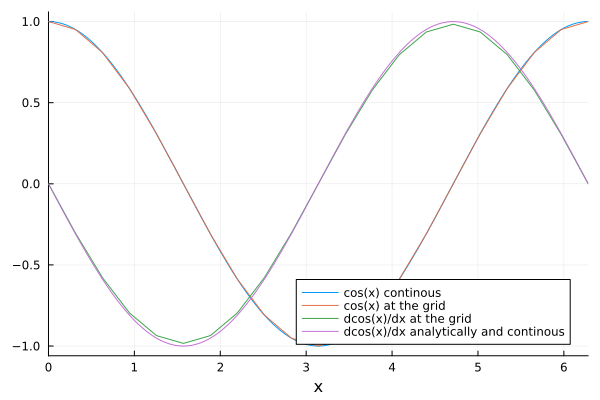

In [7]:
g = Grid(range(0,2π,step=π/10)) # initialize the grid 
cos_data = cos.(g.x) # evaluate cos on the grid 
∂_x = NeumannFD(g) # initialize the FD 
dcos_data = ∂_x(cos_data) # apply the FD 

plot(cos, xlims=[0,2π], label="cos(x) continous", xlabel="x")
plot!(g.x, cos_data, label="cos(x) at the grid")
plot!(g.x, dcos_data, label="dcos(x)/dx at the grid")
plot!(x->-sin(x), label="dcos(x)/dx analytically and continous")

We can also look at the finite difference matrix again: 

* Periodic Boundary conditions work almost the same, we can also use the same example as $cos(x)$ is periodic

In [8]:
"""
    PeriodicFD{T}

Finite Difference Scheme matrix with Periodic Boundary Conditions

"""
struct PeriodicFD{T} <: AbstractFiniteDifferencesScheme{T}
    M::T
end 

function PeriodicFD(T::DataType, n::Integer, Δx::Number=1)
    M = diagm(-1=>(-1*ones(T, n-1)),1=>ones(T, n-1))
    M[1,n] = T(-1)
    M[n,1] = T(1)
    M ./= T(2*Δx)
    PeriodicFD(M)
end 

PeriodicFD(grid::Grid{T}) where T = PeriodicFD(T, grid.N, grid.Δx)

PeriodicFD

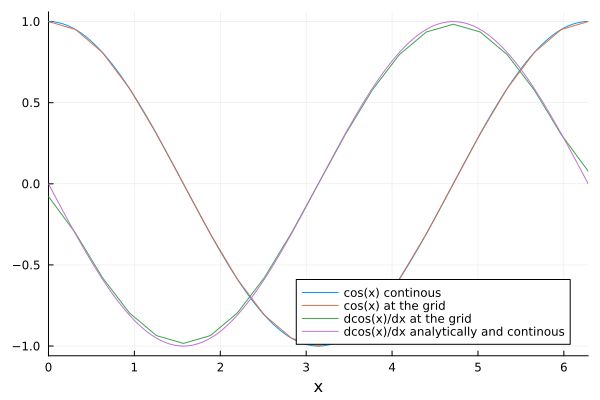

In [9]:
∂_x_P = PeriodicFD(g) # initialize the FD 
dcos_data = ∂_x_P(cos_data) # apply the FD 

plot(cos, xlims=[0,2π], label="cos(x) continous", xlabel="x")
plot!(g.x, cos_data, label="cos(x) at the grid")
plot!(g.x, dcos_data, label="dcos(x)/dx at the grid")
plot!(x->-sin(x), label="dcos(x)/dx analytically and continous")

In [10]:
∂_x_P.M

21×21 Matrix{Float64}:
  0.0       1.59155   0.0       0.0      …   0.0       0.0      -1.59155
 -1.59155   0.0       1.59155   0.0          0.0       0.0       0.0
  0.0      -1.59155   0.0       1.59155      0.0       0.0       0.0
  0.0       0.0      -1.59155   0.0          0.0       0.0       0.0
  0.0       0.0       0.0      -1.59155      0.0       0.0       0.0
  0.0       0.0       0.0       0.0      …   0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0      …   0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0       0.0       0.0       0.0          0.0       0.0       0.0
  0.0  

#### Matrix Formats

A further optimization is possible when we use matrix types that are specialized on banded matrices, like `BandedMatrices.jl` or sparse matrices like `SparseArrays.jl`. 

Other matrices formats not only save memory but also provide much more efficient ways of multiplying matrices with the given structure: 

In [11]:
using BandedMatrices, SparseArrays, BenchmarkTools  

M_sparse = sparse(∂_x_P.M)

21×21 SparseMatrixCSC{Float64, Int64} with 42 stored entries:
⎡⠪⡢⡀⠀⠀⠀⠀⠀⠀⠀⠁⎤
⎢⠀⠈⠪⡢⡀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠪⡢⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠪⡢⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠪⡢⡀⎥
⎣⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⎦

In [13]:
T = Float64
n = g.N
M_banded = BandedMatrix(-1=>(-1*ones(T, n-1)),1=>ones(T, n-1),(n-1)=>T(-1)*ones(T, 1), -n+1=>ones(T, 1)) # same syntax as diagm

21×21 BandedMatrix{Float64} with bandwidths (20, 20):
  0.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  -1.0
 -1.0   0.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   0.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0  

In [14]:
@btime M_banded * cos_data

  374.593 ns (1 allocation: 224 bytes)


21-element Vector{Float64}:
 -0.04894348370484647
 -0.19098300562505255
 -0.3632712640026804
 -0.5
 -0.587785252292473
 -0.6180339887498948
 -0.5877852522924731
 -0.5
 -0.3632712640026805
 -0.19098300562505266
 -1.1102230246251565e-16
  0.19098300562505255
  0.3632712640026804
  0.4999999999999999
  0.587785252292473
  0.6180339887498948
  0.5877852522924731
  0.5000000000000001
  0.3632712640026806
  0.19098300562505266
  0.04894348370484647

In [15]:
@btime M_sparse * cos_data

  54.611 ns (1 allocation: 224 bytes)


21-element Vector{Float64}:
 -0.07789597363763945
 -0.3039588939177438
 -0.5781641734926749
 -0.7957747154594766
 -0.935489283788639
 -0.983631643083466
 -0.935489283788639
 -0.7957747154594768
 -0.5781641734926751
 -0.3039588939177438
 -2.220446049250313e-16
  0.3039588939177438
  0.578164173492675
  0.7957747154594765
  0.9354892837886389
  0.983631643083466
  0.9354892837886392
  0.795774715459477
  0.5781641734926752
  0.3039588939177438
  0.07789597363763945

In [16]:
@btime ∂_x_P.M * cos_data

  141.284 ns (1 allocation: 224 bytes)


21-element Vector{Float64}:
 -0.07789597363763945
 -0.30395889391774367
 -0.5781641734926749
 -0.7957747154594766
 -0.935489283788639
 -0.983631643083466
 -0.935489283788639
 -0.7957747154594768
 -0.5781641734926751
 -0.3039588939177438
 -1.5327598477099124e-16
  0.30395889391774367
  0.578164173492675
  0.7957747154594765
  0.9354892837886389
  0.983631643083466
  0.935489283788639
  0.795774715459477
  0.5781641734926752
  0.3039588939177438
  0.07789597363763948

* (21,21)-matrices are still quite small, generally other matrix formats are compariably even faster for high dimensional systems. 
* In this case `SparseArrays` are the fastest (I am not sure why `BandedMatrices` is so much slower here)
* `SparseArrays` also have support for GPUs, `BandedMatrices` not

## Solving the Heat Equation 

### The Problem 

* A fundamental part of every climate model (and many other models as well) is how heat diffuses. It can also serve as an easy PDE to test our approaches 
* The heat equation in 2d is given as 

$$ \rho c\frac{\partial T}{\partial t} = k \Delta T = k \left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) T$$

* with 
    * $\Delta$ the Laplace operator, the sum of all second derivatives 
    * $\rho$ density of the material, $c$ heat capacity, $k$ thermal conductivity
    * often one defines $D^2 = k/(\rho c)$ diffusivity 
    
$$ \frac{\partial T}{\partial t} = D^2 \Delta T $$

Here, we will set Dirichlet boundary conditions, so that that $x\in[0,L]$, $y\in[0,L]$, $T(0,y,t)=0\forall y,t$, $T(L,y,t)=0\forall y,t$, $T(x,0,t)=0\forall x,t$, $T(x,L,t)=0\forall x,t$. We have to discretize the 2d domain, in this case we will chose $n_x=n_y=n$ points in each direction with a spacing $h$ between two neighouring points, so that we have in total $n^2$ grid points $(x_i,y_i)$ and temperature values at these points $T_{ij}$ 


In [17]:
struct Grid2D 
    x # this is a n_x long range
    y
    h_x
    h_y
    n # number of grid points along one side
    N # total number of grid points 
    x_grid # this is a n_x x n_y matrix 
    y_grid
end 

function Grid2D(x::AbstractRange, y::AbstractRange)
    h_x = abs(x[2] - x[1])
    h_y = abs(y[2] - y[1])
    n_x = length(x)
    n_y = length(y)
    @assert n_x == n_y
    
    N = n_x * n_y 
    x_grid = ones(n_x) * x' # meshgrid 
    y_grid = y * ones(n_y)' # meshgrid
    
    Grid2D(x, y, h_x, h_y, n_x, N, x_grid, y_grid)
end 

L = 10
n = 64
g = Grid2D(range(0,L,length=n),range(0,L,length=n))
g.y_grid

64×64 Matrix{Float64}:
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.15873    0.15873    0.15873       0.15873    0.15873    0.15873
  0.31746    0.31746    0.31746       0.31746    0.31746    0.31746
  0.47619    0.47619    0.47619       0.47619    0.47619    0.47619
  0.634921   0.634921   0.634921      0.634921   0.634921   0.634921
  0.793651   0.793651   0.793651  …   0.793651   0.793651   0.793651
  0.952381   0.952381   0.952381      0.952381   0.952381   0.952381
  1.11111    1.11111    1.11111       1.11111    1.11111    1.11111
  1.26984    1.26984    1.26984       1.26984    1.26984    1.26984
  1.42857    1.42857    1.42857       1.42857    1.42857    1.42857
  1.5873     1.5873     1.5873    …   1.5873     1.5873     1.5873
  1.74603    1.74603    1.74603       1.74603    1.74603    1.74603
  1.90476    1.90476    1.90476       1.90476    1.90476    1.90476
  ⋮                               ⋱                        
  8.25397    8.25397    8.25397    


### Finite Difference Schemes

Additionally, we need finite difference matrices for the second derivative (or the Laplace operator). We can get these by combining two Taylor expansions:

$$\begin{align}
    f(x+h) &= f(x) + h f'(x) + 0.5 h^2 f''(x) + \mathcal{o}(h^3)\\ 
    f(x-h) &= f(x) - h f'(x) + 0.5 h^2 f''(x) - \mathcal{o}(h^3)\\ 
  f(x+h) + f(x-h) &= 2f(x) + h^2 f''(x) + \mathcal{o}(h^4) \\ 
    f''(x) &= \frac{ f(x+h) - 2f(x) + f(x-h)}{h^2} + \mathcal{o}(h^4)
\end{align}$$

For the Laplace operator we can combine two of these finite difference schemes: 

$$\begin{align}
    \Delta f(x,y,t) &= \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} \\ 
    \Delta f(x,y,t) &\approx \frac{ f(x+h,y) - 2f(x,y) + f(x-h,y)}{h^2} +  \frac{ f(x,y+h_x) - 2f(x,y) + f(x,y-h)}{h^2}\\
     \Delta f(x,y,t) &\approx \frac{ f(x+h,y) + f(x,y+h) - 4f(x,y) + f(x-h,y) + f(x,y-h)}{h^2}\\
     \Delta T_{ij}(t) &\approx \frac{ T_{i+1,j} + T_{i,j+1} - 4T_{i,j} + T_{i-1,j} + T_{i,j+1}}{h^2}
\end{align}$$

We can see that the discretized Laplace operator contains the grid point itself and all direct neighours of this point in the grid. 

![im_label](assets/pde-finitediff.png)

### Finite Difference Matrices

Now, to get this into matrix form we have to deal with the fact that we have a two-dimensional domain. We can do this by flattening the two-dimensional state matrix into a 1d vector: 

$$\begin{pmatrix}T_{1,1} & T_{1,2} & ... & T_{1,n} \\ T_{2,1} & ... & ... & ... \\ ... & ... & ... & ... \\ T_{n,1} & ... & ... & T_{n,n}\end{pmatrix}\rightarrow\begin{pmatrix}T_{1,1} \\ T_{1,2} \\ ... \\ T_{1,n} \\ T_{2,1} \\ T_{2,2} \\ ... \\ T_{n,n-1} \\ T_{n,n}\end{pmatrix}$$

In [18]:
flat_x = reshape(g.x_grid,:)

4096-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0

In [19]:
reshape(flat_x, g.n, g.n)

64×64 Matrix{Float64}:
 0.0  0.15873  0.31746  0.47619  0.634921  …  9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921  …  9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921  …  9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921     9.52381  9.68254  9.84127  10.0
 0.0  0.15873  0.31746  0.47619  0.634921

* We also have to consider the Dirichlet boundary condition: $T(0,y,t)=0\forall y,t$, $T(L,y,t)=0\forall y,t$, $T(x,0,t)=0\forall x,t$, $T(x,L,t)=0\forall x,t$
    * We will do that by setting all elements of the matrix at the boundary points $0$ and only choose initial conditions that also adhere to the BC. 

In [25]:
struct DirichletBC 
    M 
end 

function DirichletBC(g::Grid2D)
    bc = ones(Bool, g.n, g.n) 
    bc[1,:] .= 0
    bc[end,:] .= 0
    bc[:,1] .= 0
    bc[:,end] .= 0
    DirichletBC(reshape(bc,:))
end

(bc::DirichletBC)(x) = bc.M .* x

In [18]:
reshape(DirichletBC(g).M,g.n,g.n)

64×64 Matrix{Bool}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     1

* For the finite difference matrix we now have to find the neighours of each grid point in both direction
    * In $x$-direction these are just the neighbouring elements in the vector 
    * In $y$-direction these are the elements $n$ elements apart
* Finite difference matrices have most elements as zeros, we can thus also convert them easily to `SparseArrays` for some performance gain

In [21]:
using SparseArrays, LinearAlgebra 

struct Laplacian2D 
   M 
end 

function Laplacian2D(g::Grid2D)
    n = g.n
    N = g.N 
    
    # these are the neighbours in x-direction 
    M = diagm(0=>-4*ones(N), 1=>ones(N-1), -1=>ones(N-1))
    
    # these are the neighbours in y-direction
    M += diagm(n=>ones(N-n), -n=>ones(N-n))
    
    Laplacian2D(sparse(M./(g.h_x^2)))
end

(Δ::Laplacian2D)(x) = Δ.M * x

In [22]:
Laplacian2D(g).M

4096×4096 SparseMatrixCSC{Float64, Int64} with 20350 stored entries:
⎡⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⎦

Finally, we have everything we need to solve the heat equation! 

Just need to set some initial conditions and all our prepared operators: 

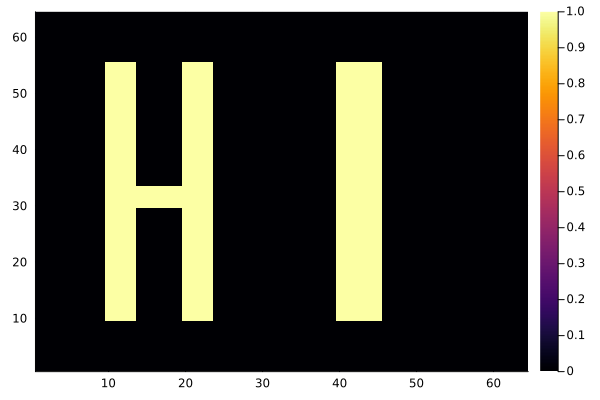

In [23]:
# initial conditions 
using Plots 

u0 = zeros(Float32, (g.n,g.n))
u0[10:55,10:13] .= 1f0
u0[30:33,14:20] .= 1f0
u0[10:55,20:23] .= 1f0
u0[10:55,40:45] .= 1f0

heatmap(u0)

In [26]:
using OrdinaryDiffEq 

∂ = DirichletBC(g)
Δ = Laplacian2D(g)
u0 = reshape(u0, :)

function heat!(du,u,p,t) 
    D, = p 
    du .= D .* ∂(Δ(u))
end 

tspan = (0.,15.)
prob = ODEProblem(heat!, u0, tspan, [0.1])
sol = solve(prob, Tsit5());

[ Info: Saved animation to /Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-8/heat.gif


Plots.AnimatedGif("/Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-8/heat.gif")
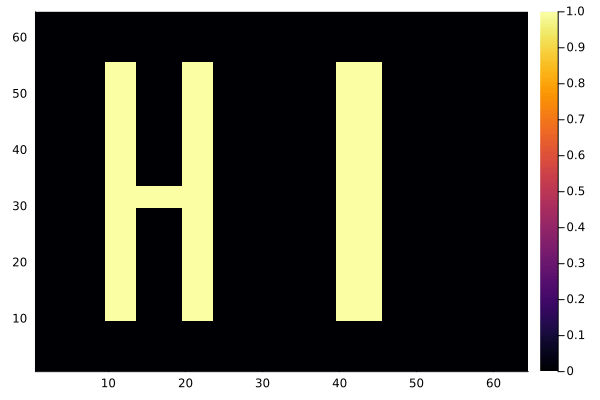

In [23]:
ts = tspan[1]:0.1:tspan[2]
anim = Plots.@animate for t ∈ ts
    Plots.heatmap(reshape(sol(t),g.n,g.n),clims=(0,1))
end

gif(anim, "heat.gif",fps=10)

# MethodofLines.jl

The Julia packages `ModelingToolkit.jl` and `MethodofLines.jl` automatize the finite difference solutions of PDEs for most systems.  

#### Comments to the Exercise 

* You know got all the tools to solve most 1D and 2D PDEs with finite differences
* In the next lecture we will use this for a more complicated energy balance model 
* The heat equation in this form is not chaotic, in the exercise you will investigate a reaction-diffusion which is chaotic: the complex Ginsburg Landau equation (CGLE)

$$\begin{align} 
    \frac{\partial u}{\partial t} = (1 + i\alpha)\Delta u - (1 - i\beta)|u|^2u\end{align}$$  
    
* The CGLE has a diffusion term ($(1 + i\alpha)\Delta u$) and a 'local' reaction term $(1 - i\beta)|u|^2u$ 
* Equations like this are typical e.g. for chemical reactions 
* The CGLE is a very prototypical equation as it can be shown that it is an approximation to every reaction-diffusion equation close to the bifurcation point when oscillations start to occur  
* That's why it is a widely studied system
* Complex numbers in Julia can be easily inialized via `complex` or by multiplication with the imaginary unit `im`